#Project: Investigate TMDb Movie Dataset

Table of Contents

Introduction

Data Wrangling

Exploratory Data Analysis

Conclusions

#Introduction
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and starting at year 1966. As a movie enthusiast, I am interested in exploring how the audience vote on movies over the years. This project is inspired by Youtube videos explaining "why modern movies are bad", arguing that the quality and creativity are deteriorating. I suspect that the runtime has something to do with this. I am also interested in some general details, such the number of outputs per genre and profitability. This project will use films in the TMDb database to answer the following questions.

#Question which we want to answer with EDA
How has the output of movies changed over the years?

Average Runtime Of Movies From Year To Year?

Average Vote Of Movies From Year To Year?

Over the years, how has the output for films of different lengths (short,
average, and long) changed?

What is the relationship between the films' length and vote average over time?

Total Number Of Movies Released For Each Genre?

Average Profit By Year?

What Is The Relationship Between Release Year And Profit?

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data Wrangling

In [7]:
# loading the data
df =  pd.read_csv('/content/tmdb-movies.csv')

In [9]:
#top 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [11]:
#getting a summary with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 as we can see some columns has a nul value

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are a lot of movies where the budget and revenue are 0, meaning they never made it to thearter

In [14]:
## Since we know we are dealing with alot of 0s, lets check out how many
print(f"Total Rows With 0 In Budget:{df[df['budget']==0].shape[0]}")
print(f"Total Rows With 0 In Revenue:{df[df['revenue']==0].shape[0]}")

Total Rows With 0 In Budget:5696
Total Rows With 0 In Revenue:6016


In [15]:
#checking the null value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data Cleaning

In [20]:
# checking the duplicates row
df.duplicated().sum()

# droping the duplicted valye
df.drop_duplicates(inplace = True)

# again checing the diplicates value
df.duplicated().sum()

0

In [21]:
#Change Release Date to Datetime
df['release_date'] =  pd.to_datetime(df['release_date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [23]:
#Removing all unneeded columns
df.drop(['id', 'imdb_id','budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords', 'overview'],axis =1,inplace = True)
print(f"After dropping the unneeded columns there is a total of {df.shape[1]} columns.")

After dropping the unneeded columns there is a total of 13 columns.




Although this step can be executed, I have chosen not to carry out this step because there is a variety of reasons that can explain why revenue and budget turn up as 0. Perhaps, one of the biggest reasons is simply they didn't keep track at the time which can explain the inapproriate values. Therefore, I conclude that it's inapproroiate to remove them. Let's just examine these rows.

In [24]:
#Drop Rows With Incorrect Values
df.drop(df[df['budget']==0].index, inplace=True)
df.drop(df[df['revenue']==0].index, inplace=True)

print(f"Total Rows With 0 In Budget After Dropping:{df[df['budget']==0].shape[0]}")
print(f"Total Rows With 0 In Revenue After Dropping:{df[df['revenue']==0].shape[0]}")

Total Rows With 0 In Budget After Dropping:0
Total Rows With 0 In Revenue After Dropping:0


In [27]:
df.shape

(3854, 13)

Not settle down missing value because we are not making a prdiction model

#Exploratory Data Analysis

Please be aware that all of my visuals and codes will be below the markdown cell containing the question.

#Question 1: How has the output of movies changed over the years?

Text(0, 0.5, '# Of Movies')

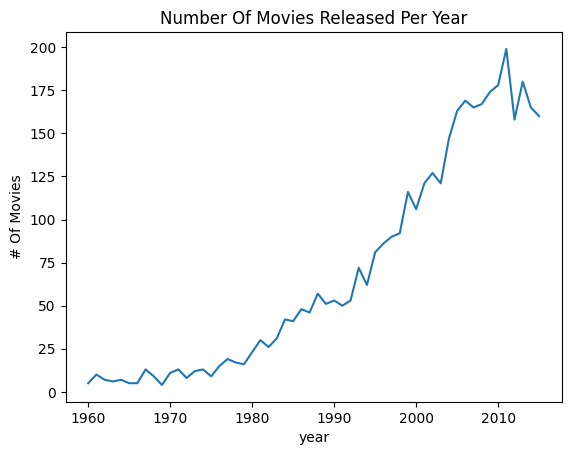

In [31]:
output_change = df.groupby('release_year').count()['original_title']

#graph
plt.plot(output_change)
plt.title("Number Of Movies Released Per Year")
plt.xlabel('year')
plt.ylabel("# Of Movies")

It should come as no surprise that the number of movies has risen over time. From the beginning of 1960 to 2015, the line graph shows an exponential increase of movies released per year, starting from about 25 movies and hovering between 150-200 in recent years.

#Question 2: Average Runtime Of Movies From Year To Year?

Text(0, 0.5, 'Runtime in min')

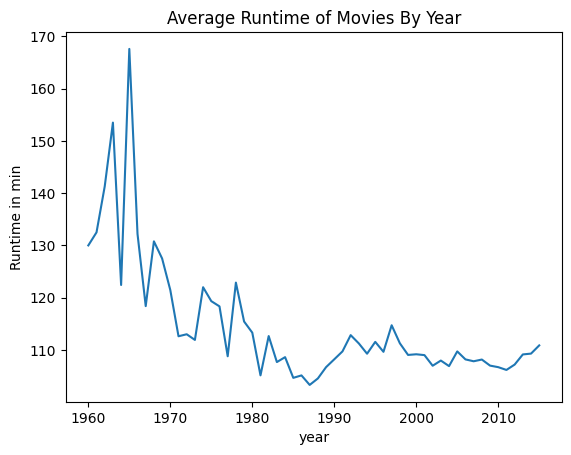

In [34]:
year_runtime_mean = df.groupby('release_year')['runtime'].mean()

#graph
plt.plot(year_runtime_mean)

plt.title('Average Runtime of Movies By Year')
plt.xlabel('year')
plt.ylabel('Runtime in min')


Over the long term, the average runtime is getting shorter with occasional spikes. The average runtime decreased from about 170 minutes to 110.

In [36]:
df.groupby('release_year')['runtime'].mean().sort_values()

release_year
1987    103.304348
1988    104.543860
1985    104.658537
1986    105.125000
1981    105.133333
2011    106.170854
2010    106.702247
1989    106.705882
2004    106.904762
2002    106.976378
2009    107.000000
2012    107.196203
1983    107.677419
2007    107.830303
2003    107.966942
2008    108.161677
2006    108.189349
1990    108.207547
1984    108.619048
1977    108.789474
2001    109.008264
1999    109.043103
2013    109.138889
2000    109.169811
1994    109.274194
2014    109.296970
1996    109.639535
2005    109.717791
1991    109.720000
2015    110.868750
1993    111.236111
1998    111.271739
1995    111.543210
1973    111.916667
1971    112.615385
1982    112.653846
1992    112.830189
1972    113.000000
1980    113.304348
1997    114.722222
1979    115.437500
1976    118.333333
1967    118.384615
1975    119.333333
1970    121.454545
1974    122.000000
1964    122.428571
1978    122.882353
1969    127.500000
1960    130.000000
1968    130.777778
1966    132.200000

#Question 3: Average Vote Of Movies From Year To Year?

Text(0, 0.5, 'average of vote')

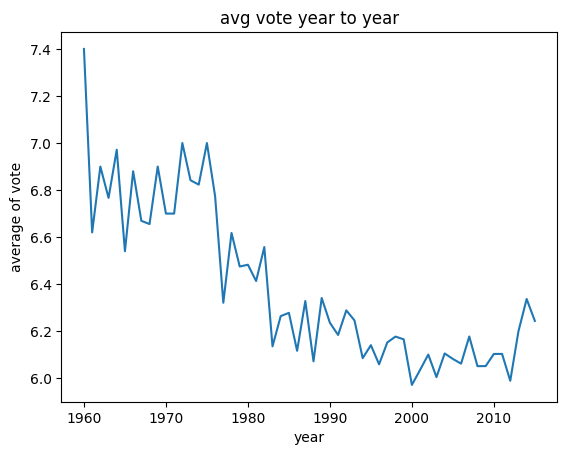

In [38]:
#Viewing the vote_average thru a line plot
year_vote_mean =  df.groupby('release_year')['vote_average'].mean()

#graph
plt.plot(year_vote_mean)
plt.title('avg vote year to year')
plt.xlabel('year')
plt.ylabel('average of vote')


ince the 1960s, the line graph shows the average votes of all movies in each respective year has been declining from decade to decade. Starting from roughly 7.4 in the 60s then sinking to 6 as of 2010, even hitting a low point of 5.8.

In [39]:
df.groupby('release_year')['vote_average'].mean()

release_year
1960    7.400000
1961    6.620000
1962    6.900000
1963    6.766667
1964    6.971429
1965    6.540000
1966    6.880000
1967    6.669231
1968    6.655556
1969    6.900000
1970    6.700000
1971    6.700000
1972    7.000000
1973    6.841667
1974    6.823077
1975    7.000000
1976    6.773333
1977    6.321053
1978    6.617647
1979    6.475000
1980    6.482609
1981    6.413333
1982    6.557692
1983    6.135484
1984    6.264286
1985    6.278049
1986    6.116667
1987    6.328261
1988    6.071930
1989    6.341176
1990    6.235849
1991    6.184000
1992    6.288679
1993    6.245833
1994    6.085484
1995    6.140741
1996    6.059302
1997    6.152222
1998    6.177174
1999    6.165517
2000    5.971698
2001    6.035537
2002    6.100787
2003    6.004959
2004    6.105442
2005    6.082209
2006    6.062130
2007    6.177576
2008    6.051497
2009    6.051724
2010    6.103371
2011    6.103518
2012    5.989241
2013    6.200000
2014    6.336970
2015    6.243750
Name: vote_average, dtype: float64

#Question 4: Over the years, how has the output for films of different lengths (short, average, and long) changed?

Step 1: First, we want to create a mask with 'runtime' variable. We will seperate the movies into 3 different categories: short, average and long. Afterward, we need to determine how to seperate the time; to do this, we did a quick Google search of average film length. Using information gathered from Toward Data Science (https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b#:~:text=Vast%20majority%20of%20movies%20is,average%20movie%20runtime%20by%20year), we have determined that short films are less than 80 minutes, long film are more than 120 minutes and everything else is considered average.


Step 2: In this step, we are interested in studying the output of films over the years, based on the length of the film. The best way to do this is by creating a histogram (down below).

Observations: As we can see from the histogram, the output of average-length films has grown exponentially; average-length movies have consistently beaten long and short movies (combined) when it comes to output. The output for short films has remained almost the same until the 90s when it grew exponentially to catch up with long movies.

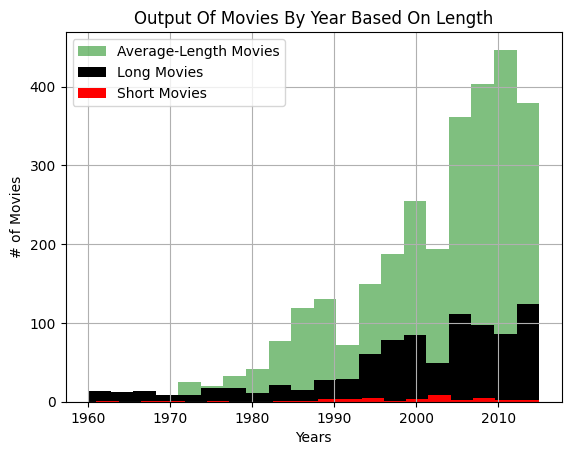

In [40]:
# Create a mask with 'runtime'
short_movies = df['runtime'] < 80
average_movies = (df['runtime'] >= 80) & (df['runtime'] <= 120)
long_movies = df['runtime'] > 120

#Lets see how the output level of each movie length (short, average, long) by year
df['release_year'][average_movies].hist(alpha=0.5, bins = 20, label = "Average-Length Movies", color = "green")
df['release_year'][long_movies].hist(bins = 20,label = "Long Movies",color = "black")
df['release_year'][short_movies].hist(bins = 20,label = "Short Movies", color = "red")
plt.title("Output Of Movies By Year Based On Length")
plt.xlabel("Years")
plt.ylabel("# of Movies")
plt.legend();

As we can see from the histogram, the output of average-length films has grown exponentially; average-length movies have consistently beaten long and short movies (combined) when it comes to output. The output for short films has remained almost the same until the 90s when it grew exponentially to catch up with long movies.

#Question 5: What is the relationship between the films' length and vote average over time?

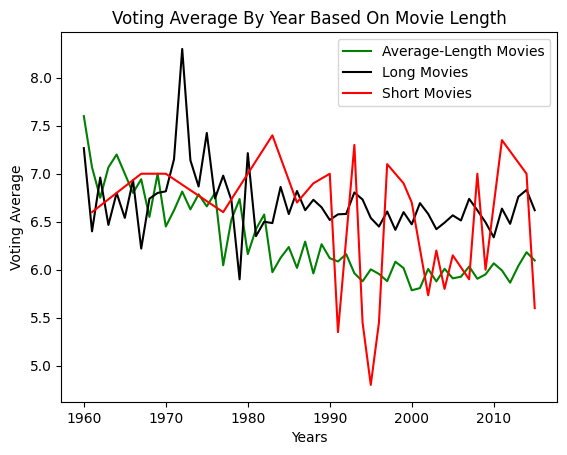

In [41]:
df[average_movies].groupby('release_year')['vote_average'].mean().plot(label = "Average-Length Movies", color = "green")
df[long_movies].groupby('release_year')['vote_average'].mean().plot(label = "Long Movies", color = "black")
df[short_movies].groupby('release_year')['vote_average'].mean().plot(label = "Short Movies", color = "red")
plt.title("Voting Average By Year Based On Movie Length")
plt.xlabel("Years")
plt.ylabel("Voting Average")
plt.legend();

rom the line plot, we can see that the voting averages for short movies is the most volatile while the ones for long movies are generally stable. However, it should be noted that long movies' averages have been experiencing a slight uptrend after a sudden drop after 1960. The voting averages for the Average-Length movies tell a different story; the averages have been steadily declining over the decades since the beginning, sinking below 6.0 and showing signs of trending down further.

#Question 6: Total Number Of Movies Released For Each Genre?

<Axes: >

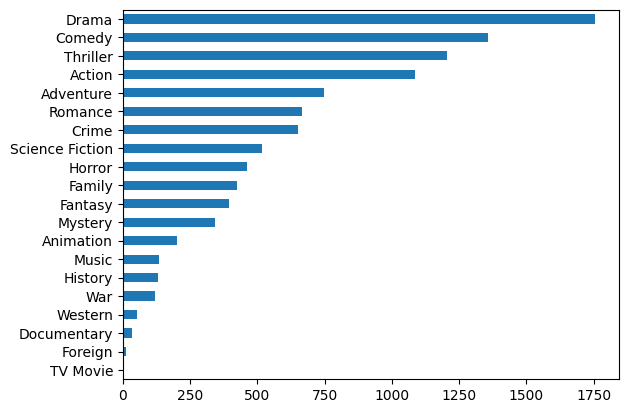

In [43]:
#Creating a function to split the genres and count them
def count_genre(x):
    all_data = df[x].str.cat(sep = '|')
    specific_data = pd.Series(all_data.split('|'))
    #counting each of the genre
    counter = specific_data.value_counts(ascending=True)
    return counter

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh')

As seen the bar graph below, Drama has released the most number of movies, followed by Comedy and Thriller The lowest output by genre is Western, which is a bit surprising.



In [44]:
total_genre_movies

TV Movie              1
Foreign              13
Documentary          35
Western              52
War                 119
History             129
Music               136
Animation           201
Mystery             344
Fantasy             396
Family              425
Horror              463
Science Fiction     519
Crime               651
Romance             667
Adventure           749
Action             1085
Thriller           1204
Comedy             1358
Drama              1756
dtype: int64

#Question 7: Average Profit By Year?

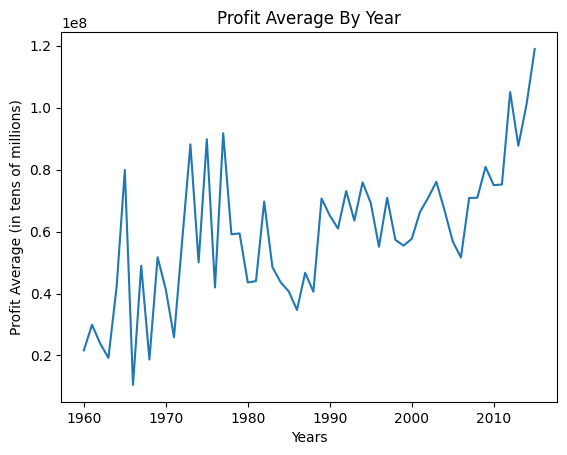

In [45]:
# We need to calculate Profit and a new column for it
df['profit'] = df['revenue'] - df['budget']

profit_year = df.groupby('release_year')['profit'].mean()
plt.plot(profit_year)
plt.title("Profit Average By Year")
plt.xlabel("Years")
plt.ylabel("Profit Average (in tens of millions)");

Overall, the line graph shows profit rising over the decades. From 1960 to 2010, we can see that the average profit has 6 times the intial average profit. This leads me to my final question. Is there a relationship between the release year and profit?

#Question 8: What Is The Relationship Between Release Year And Profit?

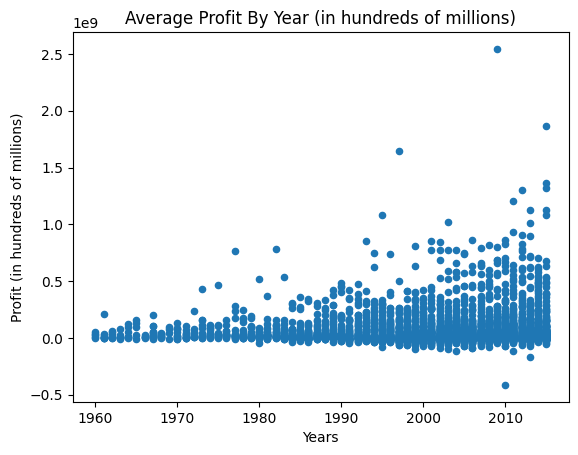

In [46]:
df.plot(x = 'release_year', y = 'profit', kind = "scatter")
plt.title("Average Profit By Year (in hundreds of millions)")
plt.xlabel("Years")
plt.ylabel("Profit (in hundreds of millions)");

Now that we had a visualized the dataset, we can see that the datas are plotted straight across the graph in a literal straight line. We can tell from the graph that the correlation must be close to 0, which confirmed was in the next step to be about 0.03. This means that there is no relationship between the 2 variables!

In [47]:
print(f"The correlation between profit and release year is: {df.corr()['release_year']['profit']}.")

The correlation between profit and release year is: 0.08797085663909684.


<ipython-input-47-24769410e1ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"The correlation between profit and release year is: {df.corr()['release_year']['profit']}.")


#Conclusions

#Summary

#Question 1:
 From the beginning of 1960 to 2010, the line graph shows an exponential increase of movies released per year, starting from about 25 movies and hovering between 175-200 in recent years.

#Question 2:
 Over the long term, the average runtime is getting shorter with occasional spikes. The average runtime decreased from 170 minutes to 110.

#Question 3:
ince the 1960s, the line graph shows the average votes of all movies in each respective year has been declining from decade to decade. Starting from roughly 7.4 in the 60s then sinking to 6 as of 2010, even hitting a low point of 5.8.

#Question 4:
 As we can see from the histogram, the output of average-length films has grown exponentially; average-length movies have consistently beaten long and short movies (combined) when it comes to output. The output for short films has remained almost the same until the 90s when it grew exponentially to catch up with long movies.
#Question 5:
 From the line plot, we can see that the voting averages for short movies is the most volatile while the ones for long movies are generally stable. However, it should be noted that long movies' averages have been experiencing a slight uptrend after a sudden drop after 1960. The voting averages for the Average-Length movies tell a different story; the averages have been steadily declining over the decades since the beginning, sinking below 6.0 and showing signs of trending down further.
#Question 6:
Drama (4760) has released the most number of movies, followed by Comedy and Thriller The lowest output by genre is Western (165).
#Question 7:
 Overall, the line graph shows profit rising over the decades. From 1960 to 2015, we can see that the average profit has 6 times the intial average profit, meaning that movies are becoming more profitable over the long run.

#Question 8:
 we can see that the datas are plotted straight across the graph, a literal straight line. We can tell from the graph that the correlation must be close to 0, which confirmed was in the next step to be about 0.03. This means that there is no relationship between the 2 variables!